# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
temp_units = "imperial"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#         print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | camacha
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | tevriz
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | saint george
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | okha
Processing Record 12 of Set 1 | kashary
Processing Record 13 of Set 1 | shihezi
Processing Record 14 of Set 1 | baykit
Processing Record 15 of Set 1 | fort nelson
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | clyde river
Processing Record 

Processing Record 37 of Set 4 | port blair
Processing Record 38 of Set 4 | vostok
Processing Record 39 of Set 4 | thompson
Processing Record 40 of Set 4 | kidal
Processing Record 41 of Set 4 | plettenberg bay
Processing Record 42 of Set 4 | bodden town
Processing Record 43 of Set 4 | isiro
Processing Record 44 of Set 4 | ixtapa
Processing Record 45 of Set 4 | salitrillo
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | adelaide
Processing Record 48 of Set 4 | geraldton
Processing Record 49 of Set 4 | bambous virieux
Processing Record 0 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 1 of Set 5 | samusu
City not found. Skipping...
Processing Record 2 of Set 5 | nikolskoye
Processing Record 3 of Set 5 | yulara
Processing Record 4 of Set 5 | tasiilaq
Processing Record 5 of Set 5 | eyl
Processing Record 6 of Set 5 | itarema
Processing Record 7 of Set 5 | sao filipe
Processing Record 8 of Set 5 | ulaanbaatar
Processing

City not found. Skipping...
Processing Record 28 of Set 8 | hvide sande
Processing Record 29 of Set 8 | chapais
Processing Record 30 of Set 8 | touros
Processing Record 31 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 32 of Set 8 | constitucion
Processing Record 33 of Set 8 | los llanos de aridane
Processing Record 34 of Set 8 | dashitou
Processing Record 35 of Set 8 | baghdad
Processing Record 36 of Set 8 | rawson
Processing Record 37 of Set 8 | avera
Processing Record 38 of Set 8 | ingham
Processing Record 39 of Set 8 | severo-yeniseyskiy
Processing Record 40 of Set 8 | butembo
Processing Record 41 of Set 8 | kendari
Processing Record 42 of Set 8 | khilok
Processing Record 43 of Set 8 | hasaki
Processing Record 44 of Set 8 | manjeshwar
Processing Record 45 of Set 8 | dawlatabad
Processing Record 46 of Set 8 | nome
Processing Record 47 of Set 8 | kungurtug
Processing Record 48 of Set 8 | shizuishan
Processing Record 49 of Set 8 | sept-iles
Processing Record 0 

City not found. Skipping...
Processing Record 18 of Set 12 | ozinki
Processing Record 19 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 20 of Set 12 | ribeira grande
Processing Record 21 of Set 12 | kurilsk
Processing Record 22 of Set 12 | gondanglegi
Processing Record 23 of Set 12 | kandrian
Processing Record 24 of Set 12 | lekoni
Processing Record 25 of Set 12 | coos bay
Processing Record 26 of Set 12 | tiarei
Processing Record 27 of Set 12 | saint-joseph
Processing Record 28 of Set 12 | dingle
Processing Record 29 of Set 12 | katobu
Processing Record 30 of Set 12 | harrison
Processing Record 31 of Set 12 | matara
Processing Record 32 of Set 12 | karaul
City not found. Skipping...
Processing Record 33 of Set 12 | rio gallegos
Processing Record 34 of Set 12 | tupik
Processing Record 35 of Set 12 | fengcheng
Processing Record 36 of Set 12 | lavrentiya
Processing Record 37 of Set 12 | aykhal
Processing Record 38 of Set 12 | ajdabiya
Processing Record 39 of Set 12 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count

<bound method DataFrame.count of              City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0         camacha  33.0833  -16.3333    288.83        63          40   
1          avarua -21.2078 -159.7750    301.18        83          75   
2          tevriz  57.5090   72.4042    253.14       100          99   
3         mataura -46.1927  168.8643    294.31        74         100   
4    saint george  37.1041 -113.5841    286.72        35           0   
..            ...      ...       ...       ...       ...         ...   
554        panaba  21.2833  -88.2667    298.60        64          97   
555     warrenton -28.1140   24.8475    298.15        31          18   
556        xingyi  24.1877  102.8170    281.78        92          74   
557       prainha  -1.8000  -53.4800    303.47        58          92   
558     melnikovo  56.5558   84.0850    252.80       100         100   

     Wind Speed Country        Date  
0          8.75      PT  1675541845  
1          6.69      CK  1

In [5]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,camacha,33.0833,-16.3333,288.83,63,40,8.75,PT,1675541845
1,avarua,-21.2078,-159.7750,301.18,83,75,6.69,CK,1675541811
2,tevriz,57.5090,72.4042,253.14,100,99,0.55,RU,1675541912
3,mataura,-46.1927,168.8643,294.31,74,100,2.99,NZ,1675541763
4,saint george,37.1041,-113.5841,286.72,35,0,0.89,US,1675541611
...,...,...,...,...,...,...,...,...,...
554,panaba,21.2833,-88.2667,298.60,64,97,7.66,MX,1675542105
555,warrenton,-28.1140,24.8475,298.15,31,18,4.90,ZA,1675542105
556,xingyi,24.1877,102.8170,281.78,92,74,2.02,CN,1675542106
557,prainha,-1.8000,-53.4800,303.47,58,92,2.63,BR,1675542106


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,camacha,33.0833,-16.3333,288.83,63,40,8.75,PT,1675541845
1,avarua,-21.2078,-159.7750,301.18,83,75,6.69,CK,1675541811
2,tevriz,57.5090,72.4042,253.14,100,99,0.55,RU,1675541912
3,mataura,-46.1927,168.8643,294.31,74,100,2.99,NZ,1675541763
4,saint george,37.1041,-113.5841,286.72,35,0,0.89,US,1675541611


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The r-value is: 0.6151354430937855
y = -0.43x + 292.2


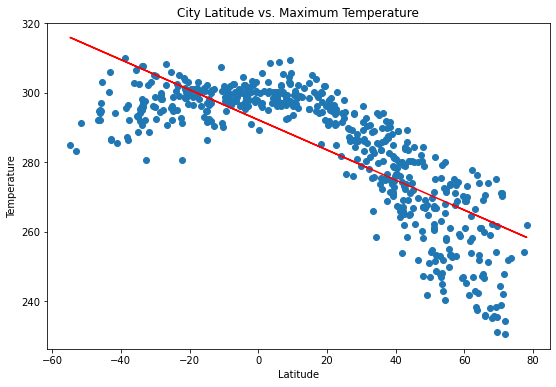

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,6))
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The r-value is: 0.031722916190581936
y = 0.12x + 68.92


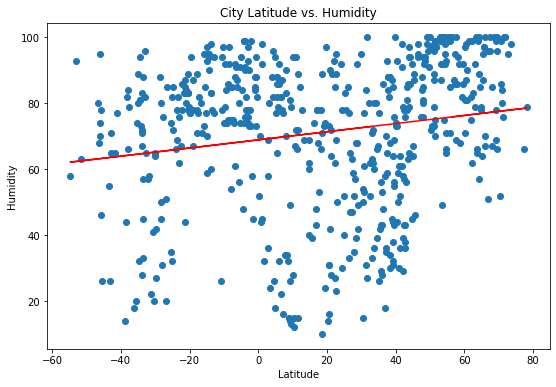

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,6))
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The r-value is: 0.011285064720985227
y = 0.13x + 58.01


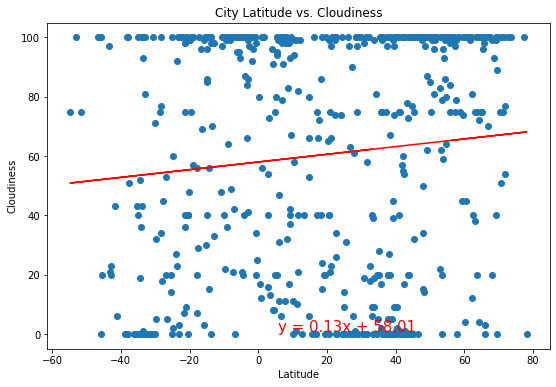

In [10]:
plt.figure(figsize=(9,6))
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

The r-value is: 0.0011620112559310328
y = -0.0x + 3.54


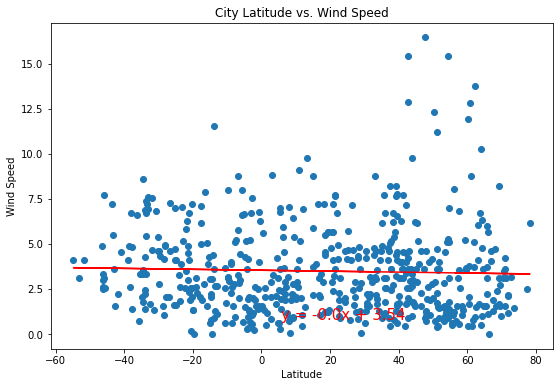

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,6))
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
linear_regression = (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,camacha,33.0833,-16.3333,288.83,63,40,8.75,PT,1675541845
2,tevriz,57.5090,72.4042,253.14,100,99,0.55,RU,1675541912
4,saint george,37.1041,-113.5841,286.72,35,0,0.89,US,1675541611
8,pevek,69.7008,170.3133,235.37,100,89,1.00,RU,1675541783
9,okha,53.5739,142.9478,244.91,99,79,4.56,RU,1675541324


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,301.18,83,75,6.69,CK,1675541811
3,mataura,-46.1927,168.8643,294.31,74,100,2.99,NZ,1675541763
5,ushuaia,-54.8000,-68.3000,284.96,58,75,4.12,AR,1675541688
6,punta arenas,-53.1500,-70.9167,283.21,93,100,3.09,CL,1675541593
7,rikitea,-23.1203,-134.9692,299.00,76,3,7.04,PF,1675541736


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.750198784413978
y = -0.93x + 296.19


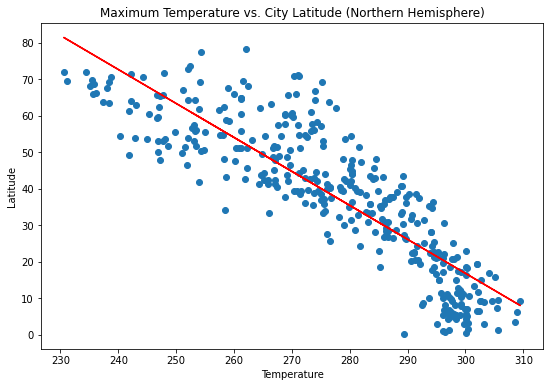

In [16]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Max Temp"]
y_values = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Maximum Temperature vs. City Latitude (Northern Hemisphere)")
plt.xlabel("Temperature")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig5.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

The r-value is: 0.09241711808685987
y = 0.82x + -264.85


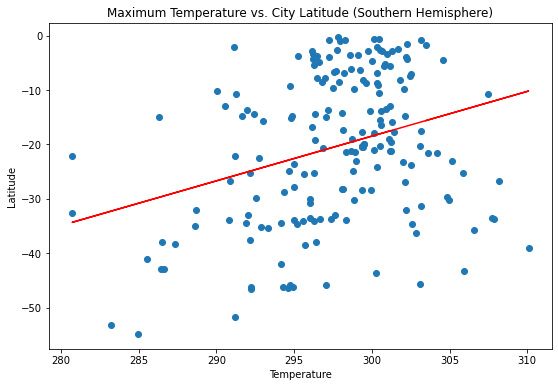

In [17]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Max Temp"]
y_values = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Maximum Temperature vs. City Latitude (Southern Hemisphere)")
plt.xlabel("Temperature")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig6.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18029352497492904
y = 0.35x + 13.01


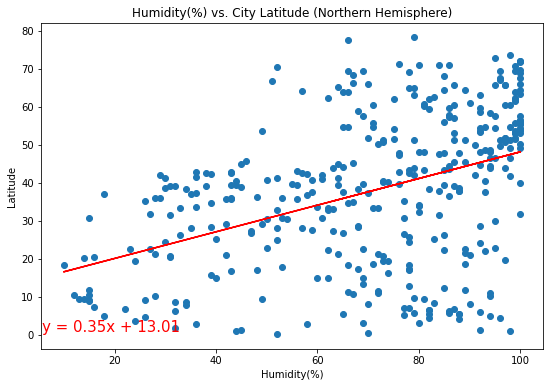

In [18]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Humidity"]
y_values = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Humidity(%) vs. City Latitude (Northern Hemisphere)")
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig7.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

The r-value is: 0.15530585639303288
y = 0.28x + -40.56


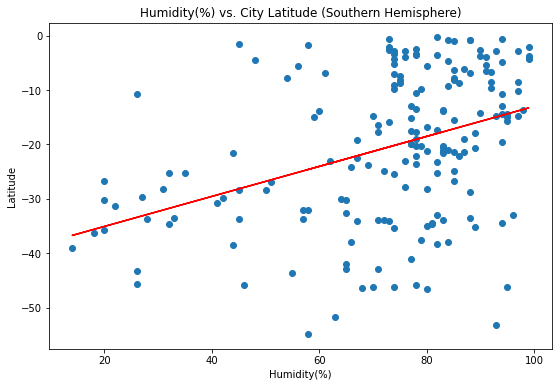

In [19]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Humidity"]
y_values = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Humidity(%) vs. City Latitude (Southern Hemisphere)")
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig8.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.046041376015360264
y = 0.11x + 31.33


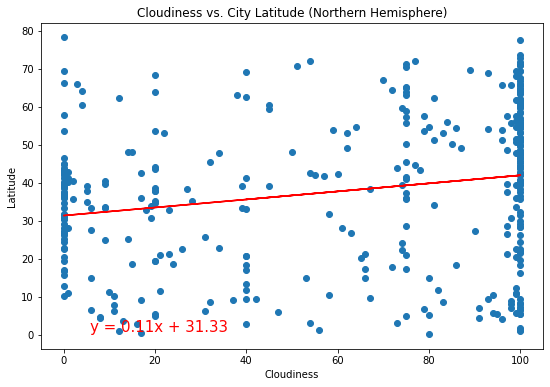

In [20]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Cloudiness"]
y_values = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Cloudiness vs. City Latitude (Northern Hemisphere)")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig9.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

The r-value is: 0.09508443801034715
y = 0.11x + -27.05


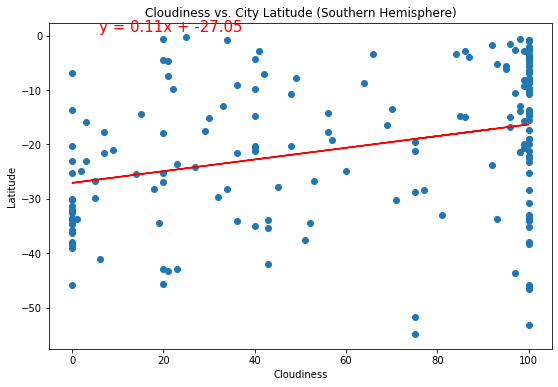

In [21]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Cloudiness"]
y_values = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Cloudiness vs. City Latitude (Southern Hemisphere)")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig10.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0002419637734475461
y = 0.12x + 37.24


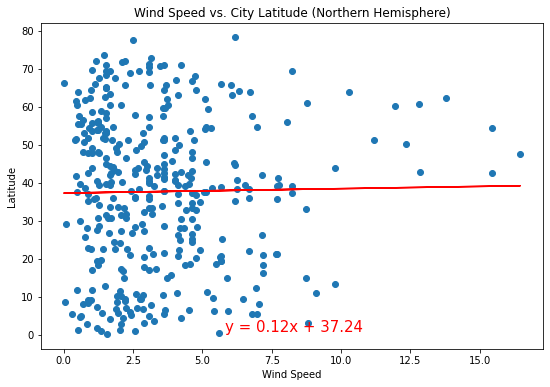

In [22]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Wind Speed"]
y_values = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Wind Speed vs. City Latitude (Northern Hemisphere)")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig11.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

The r-value is: 0.037288942143960745
y = -1.2x + -16.12


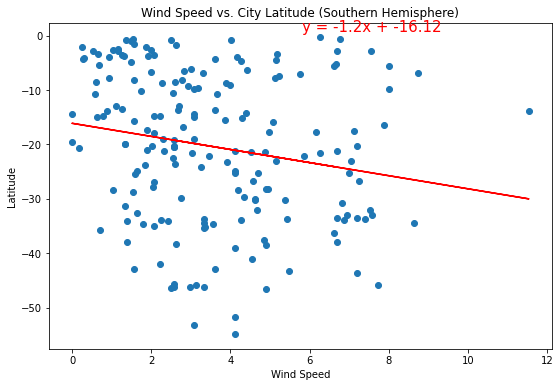

In [23]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Wind Speed"]
y_values = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Wind Speed vs. City Latitude (Southern Hemisphere)")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig12.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE